In [569]:
pip install autots

Note: you may need to restart the kernel to use updated packages.


In [570]:
!pip install auto-ts

In [571]:
conda install -c anaconda ephem


Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [572]:
pip install FBProphet


Note: you may need to restart the kernel to use updated packages.


In [573]:
conda install -c conda-forge pystan


Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [574]:
pip install holidays==0.9.12


Note: you may need to restart the kernel to use updated packages.


In [575]:
pip install dask

Note: you may need to restart the kernel to use updated packages.


In [576]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [577]:
pip install statsmodels


Note: you may need to restart the kernel to use updated packages.


In [578]:
pip install pmdarima


Note: you may need to restart the kernel to use updated packages.


In [579]:
pip install XGBoost

Note: you may need to restart the kernel to use updated packages.


In [580]:
pip install git+git://github.com/AutoViML/Auto_TS


  Cloning git://github.com/AutoViML/Auto_TS to /private/var/folders/17/1mtgmhhs7t9_dk2ctwl0gbs00000gn/T/pip-req-build-h42wtqc5
  Running command git clone -q git://github.com/AutoViML/Auto_TS /private/var/folders/17/1mtgmhhs7t9_dk2ctwl0gbs00000gn/T/pip-req-build-h42wtqc5
Note: you may need to restart the kernel to use updated packages.


In [581]:
pip install AutoTS

Note: you may need to restart the kernel to use updated packages.


Weather forecasting for Dammam city in Saudi Arabia. 
- The main objectiive is to answer the question of what the weather will be ? 
- This project done by using time series forecasting

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from sklearn.neighbors import KNeighborsClassifier
import plotly.express as px
import missingno as msno

%matplotlib inline
!pwd

# Exploratory Data Analysis

Start by reading the data!
The dataset consist of 17 elements. My target is the temperature.

In [752]:
df = pd.read_csv('/Users/rawabi7/Downloads/Dammam.csv')
df

,Date,City,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow,Snow Depth,Wind Speed,Wind Direction,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions
0,2016-01-01,Dammam,24.9,16.8,20.5,NaN,NaN,2.0,NaN,NaN,29.2,107.75,31.7,7.4,25.7,77.88,Rain
1,2016-01-02,Dammam,22.6,17.2,19.9,NaN,NaN,0.0,NaN,NaN,35.7,236.04,NaN,8.5,46.6,69.92,Partially cloudy
2,2016-01-03,Dammam,16.8,11.3,13.9,NaN,NaN,0.0,NaN,NaN,45.5,318.92,NaN,9.9,13.4,55.57,Clear
3,2016-01-04,Dammam,18.3,9.8,13.3,6.9,NaN,0.0,NaN,NaN,28.6,315.67,NaN,10.0,13.0,56.54,Clear
4,2016-01-05,Dammam,19.6,11.6,15.3,NaN,NaN,0.0,NaN,NaN,17.7,301.08,NaN,9.6,42.1,58.43,Partially cloudy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2126,2021-10-27,Dammam,33.5,21.2,27.3,NaN,31.8,0.0,NaN,NaN,13.9,96.21,NaN,9.9,0.2,45.91,Clear
2127,2021-10-28,Dammam,33.5,22.0,28.1,NaN,33.1,0.0,NaN,NaN,15.0,127.88,NaN,9.9,1.2,55.20,Clear
2128,2021-10-29,Dammam,32.5,23.3,28.4,NaN,33.7,0.0,NaN,NaN,22.6,115.50,NaN,9.2,4.6,64.71,Clear
2129,2021-10-30,Dammam,33.8,25.5,29.1,NaN,34.3,0.0,NaN,NaN,19.2,102.88,NaN,9.7,4.9,63.86,Clear


In [753]:
#changing the index
df.index
df=df.reset_index(drop=True)


In [754]:
#Set the data as datetime type 
df['Date'] = pd.to_datetime(df['Date'])

In [755]:
df.columns

Index(['Date', 'City', 'Maximum Temperature', 'Minimum Temperature',
       'Temperature', 'Wind Chill', 'Heat Index', 'Precipitation', 'Snow',
       'Snow Depth', 'Wind Speed', 'Wind Direction', 'Wind Gust', 'Visibility',
       'Cloud Cover', 'Relative Humidity', 'Conditions'],
      dtype='object')

In [756]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2131 entries, 0 to 2130
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 2131 non-null   datetime64[ns]
 1   City                 2131 non-null   object        
 2   Maximum Temperature  2131 non-null   float64       
 3   Minimum Temperature  2131 non-null   float64       
 4   Temperature          2131 non-null   float64       
 5   Wind Chill           91 non-null     float64       
 6   Heat Index           1562 non-null   float64       
 7   Precipitation        2131 non-null   float64       
 8   Snow                 0 non-null      float64       
 9   Snow Depth           197 non-null    float64       
 10  Wind Speed           2131 non-null   float64       
 11  Wind Direction       2131 non-null   float64       
 12  Wind Gust            263 non-null    float64       
 13  Visibility           2131 non-nul

In [757]:
df

,Date,City,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow,Snow Depth,Wind Speed,Wind Direction,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions
0,2016-01-01,Dammam,24.9,16.8,20.5,NaN,NaN,2.0,NaN,NaN,29.2,107.75,31.7,7.4,25.7,77.88,Rain
1,2016-01-02,Dammam,22.6,17.2,19.9,NaN,NaN,0.0,NaN,NaN,35.7,236.04,NaN,8.5,46.6,69.92,Partially cloudy
2,2016-01-03,Dammam,16.8,11.3,13.9,NaN,NaN,0.0,NaN,NaN,45.5,318.92,NaN,9.9,13.4,55.57,Clear
3,2016-01-04,Dammam,18.3,9.8,13.3,6.9,NaN,0.0,NaN,NaN,28.6,315.67,NaN,10.0,13.0,56.54,Clear
4,2016-01-05,Dammam,19.6,11.6,15.3,NaN,NaN,0.0,NaN,NaN,17.7,301.08,NaN,9.6,42.1,58.43,Partially cloudy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2126,2021-10-27,Dammam,33.5,21.2,27.3,NaN,31.8,0.0,NaN,NaN,13.9,96.21,NaN,9.9,0.2,45.91,Clear
2127,2021-10-28,Dammam,33.5,22.0,28.1,NaN,33.1,0.0,NaN,NaN,15.0,127.88,NaN,9.9,1.2,55.20,Clear
2128,2021-10-29,Dammam,32.5,23.3,28.4,NaN,33.7,0.0,NaN,NaN,22.6,115.50,NaN,9.2,4.6,64.71,Clear
2129,2021-10-30,Dammam,33.8,25.5,29.1,NaN,34.3,0.0,NaN,NaN,19.2,102.88,NaN,9.7,4.9,63.86,Clear


In [758]:
# Calculate total number of cells in dataframe
totalCells = np.product(df.shape)

# Count number of missing values per column
missingCount = df.isnull().sum()

# Calculate total number of missing values
totalMissing = missingCount.sum()
# Calculate percentage of missing values
print("The weather history dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

The weather history dataset contains 23.58 % missing values.


<AxesSubplot:>

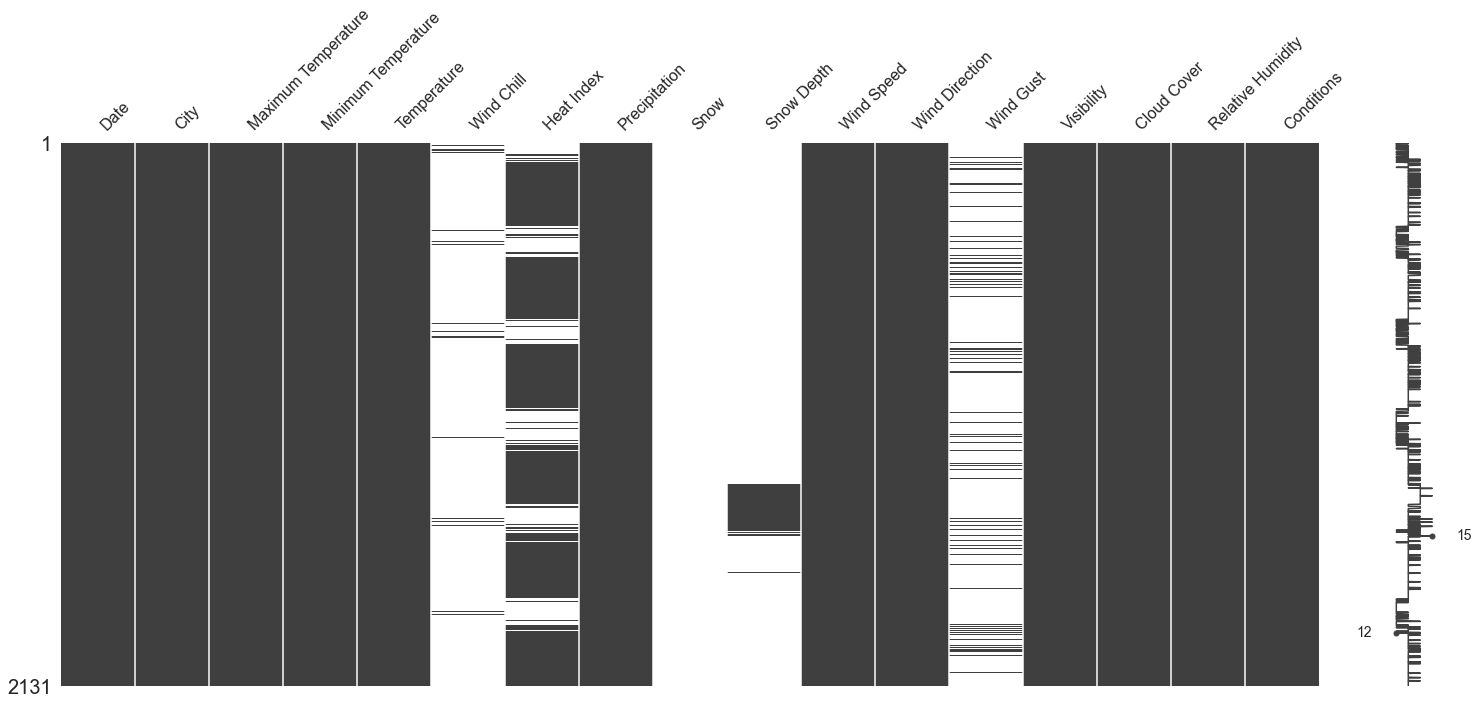

In [759]:
msno.matrix(df)

 👆🏻- Using this null data visualization, we can immediately see that there is something up with the wind chill, heat index ,snow, snow depth and wind gust columns.
- from here i will decide which columns to drop. 
- snow is completely empty columns. in addition, Dammam city have never experienced snow before. 
- dropping features we do not want in the analysis


In [712]:
#dropping features we don't want in the analysis
df = df.drop(columns =['Snow','Snow Depth','Wind Chill','Wind Gust','Precipitation'],axis=1) 
df

,Date,City,Maximum Temperature,Minimum Temperature,Temperature,Heat Index,Wind Speed,Wind Direction,Visibility,Cloud Cover,Relative Humidity,Conditions
0,2016-01-01,Dammam,24.9,16.8,20.5,NaN,29.2,107.75,7.4,25.7,77.88,Rain
1,2016-01-02,Dammam,22.6,17.2,19.9,NaN,35.7,236.04,8.5,46.6,69.92,Partially cloudy
2,2016-01-03,Dammam,16.8,11.3,13.9,NaN,45.5,318.92,9.9,13.4,55.57,Clear
3,2016-01-04,Dammam,18.3,9.8,13.3,NaN,28.6,315.67,10.0,13.0,56.54,Clear
4,2016-01-05,Dammam,19.6,11.6,15.3,NaN,17.7,301.08,9.6,42.1,58.43,Partially cloudy
...,...,...,...,...,...,...,...,...,...,...,...,...
2126,2021-10-27,Dammam,33.5,21.2,27.3,31.8,13.9,96.21,9.9,0.2,45.91,Clear
2127,2021-10-28,Dammam,33.5,22.0,28.1,33.1,15.0,127.88,9.9,1.2,55.20,Clear
2128,2021-10-29,Dammam,32.5,23.3,28.4,33.7,22.6,115.50,9.2,4.6,64.71,Clear
2129,2021-10-30,Dammam,33.8,25.5,29.1,34.3,19.2,102.88,9.7,4.9,63.86,Clear


In [713]:
# filling the heat index column with the mean value. 
df['Heat Index'].fillna(value=df['Heat Index'].mean(), inplace=True)
df

,Date,City,Maximum Temperature,Minimum Temperature,Temperature,Heat Index,Wind Speed,Wind Direction,Visibility,Cloud Cover,Relative Humidity,Conditions
0,2016-01-01,Dammam,24.9,16.8,20.5,37.787644,29.2,107.75,7.4,25.7,77.88,Rain
1,2016-01-02,Dammam,22.6,17.2,19.9,37.787644,35.7,236.04,8.5,46.6,69.92,Partially cloudy
2,2016-01-03,Dammam,16.8,11.3,13.9,37.787644,45.5,318.92,9.9,13.4,55.57,Clear
3,2016-01-04,Dammam,18.3,9.8,13.3,37.787644,28.6,315.67,10.0,13.0,56.54,Clear
4,2016-01-05,Dammam,19.6,11.6,15.3,37.787644,17.7,301.08,9.6,42.1,58.43,Partially cloudy
...,...,...,...,...,...,...,...,...,...,...,...,...
2126,2021-10-27,Dammam,33.5,21.2,27.3,31.800000,13.9,96.21,9.9,0.2,45.91,Clear
2127,2021-10-28,Dammam,33.5,22.0,28.1,33.100000,15.0,127.88,9.9,1.2,55.20,Clear
2128,2021-10-29,Dammam,32.5,23.3,28.4,33.700000,22.6,115.50,9.2,4.6,64.71,Clear
2129,2021-10-30,Dammam,33.8,25.5,29.1,34.300000,19.2,102.88,9.7,4.9,63.86,Clear


In [716]:
# Calculate total number of cells in dataframe
totalCells = np.product(df.shape)

# Count number of missing values per column
missingCount = df.isnull().sum()

# Calculate total number of missing values
totalMissing = missingCount.sum()
# Calculate percentage of missing values
print("The weather history dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

The weather history dataset contains 0.0 % missing values.


In [719]:
df=df.set_index('Date')
df

,City,Maximum Temperature,Minimum Temperature,Temperature,Heat Index,Wind Speed,Wind Direction,Visibility,Cloud Cover,Relative Humidity,Conditions
Date,,,,,,,,,,,
2016-01-01,Dammam,24.9,16.8,20.5,37.787644,29.2,107.75,7.4,25.7,77.88,Rain
2016-01-02,Dammam,22.6,17.2,19.9,37.787644,35.7,236.04,8.5,46.6,69.92,Partially cloudy
2016-01-03,Dammam,16.8,11.3,13.9,37.787644,45.5,318.92,9.9,13.4,55.57,Clear
2016-01-04,Dammam,18.3,9.8,13.3,37.787644,28.6,315.67,10.0,13.0,56.54,Clear
2016-01-05,Dammam,19.6,11.6,15.3,37.787644,17.7,301.08,9.6,42.1,58.43,Partially cloudy
...,...,...,...,...,...,...,...,...,...,...,...
2021-10-27,Dammam,33.5,21.2,27.3,31.800000,13.9,96.21,9.9,0.2,45.91,Clear
2021-10-28,Dammam,33.5,22.0,28.1,33.100000,15.0,127.88,9.9,1.2,55.20,Clear
2021-10-29,Dammam,32.5,23.3,28.4,33.700000,22.6,115.50,9.2,4.6,64.71,Clear


Visualizing certain columns along with the date. it will help to imagine the pattern that is followed
- Clearly there is a pattern.  

<AxesSubplot:xlabel='Date'>

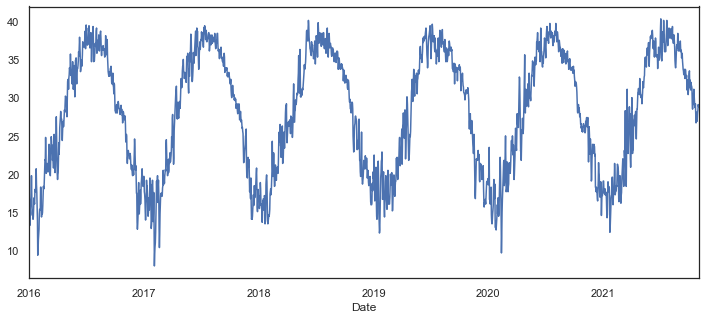

In [720]:
df['Temperature'].plot(figsize=(12,5))


<AxesSubplot:xlabel='Date'>

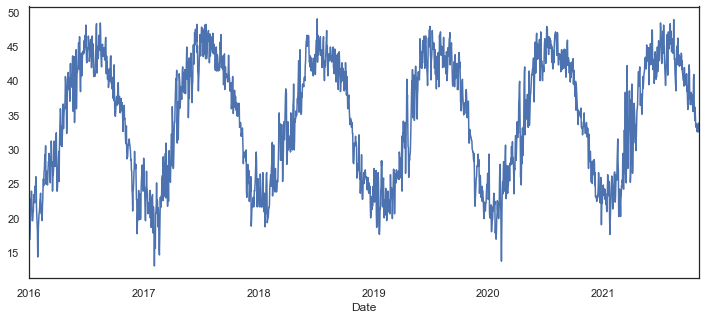

In [721]:
df['Maximum Temperature'].plot(figsize=(12,5))


<AxesSubplot:xlabel='Date'>

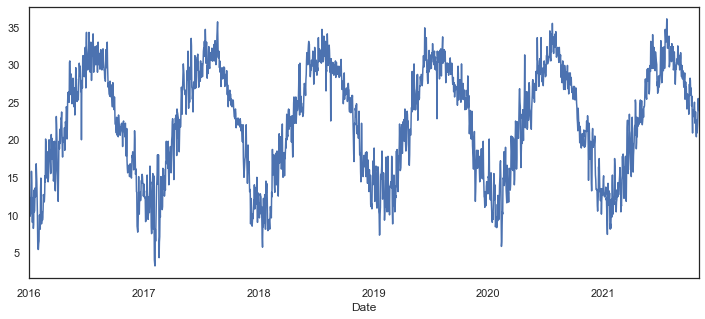

In [722]:
df['Minimum Temperature'].plot(figsize=(12,5))


<AxesSubplot:xlabel='Date'>

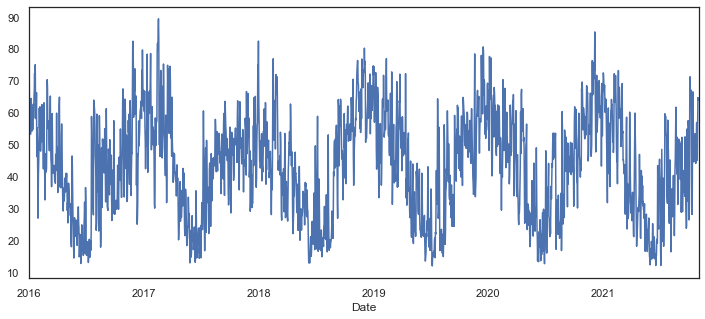

In [723]:
df['Relative Humidity'].plot(figsize=(12,5))


<AxesSubplot:xlabel='Date'>

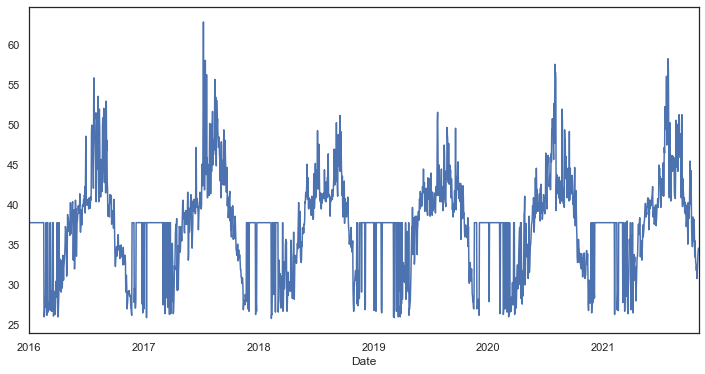

In [724]:
df['Heat Index'].plot(figsize=(12,6))


 👇🏻 Pair plots are great for quickly scanning all the data and seeing realtionships.


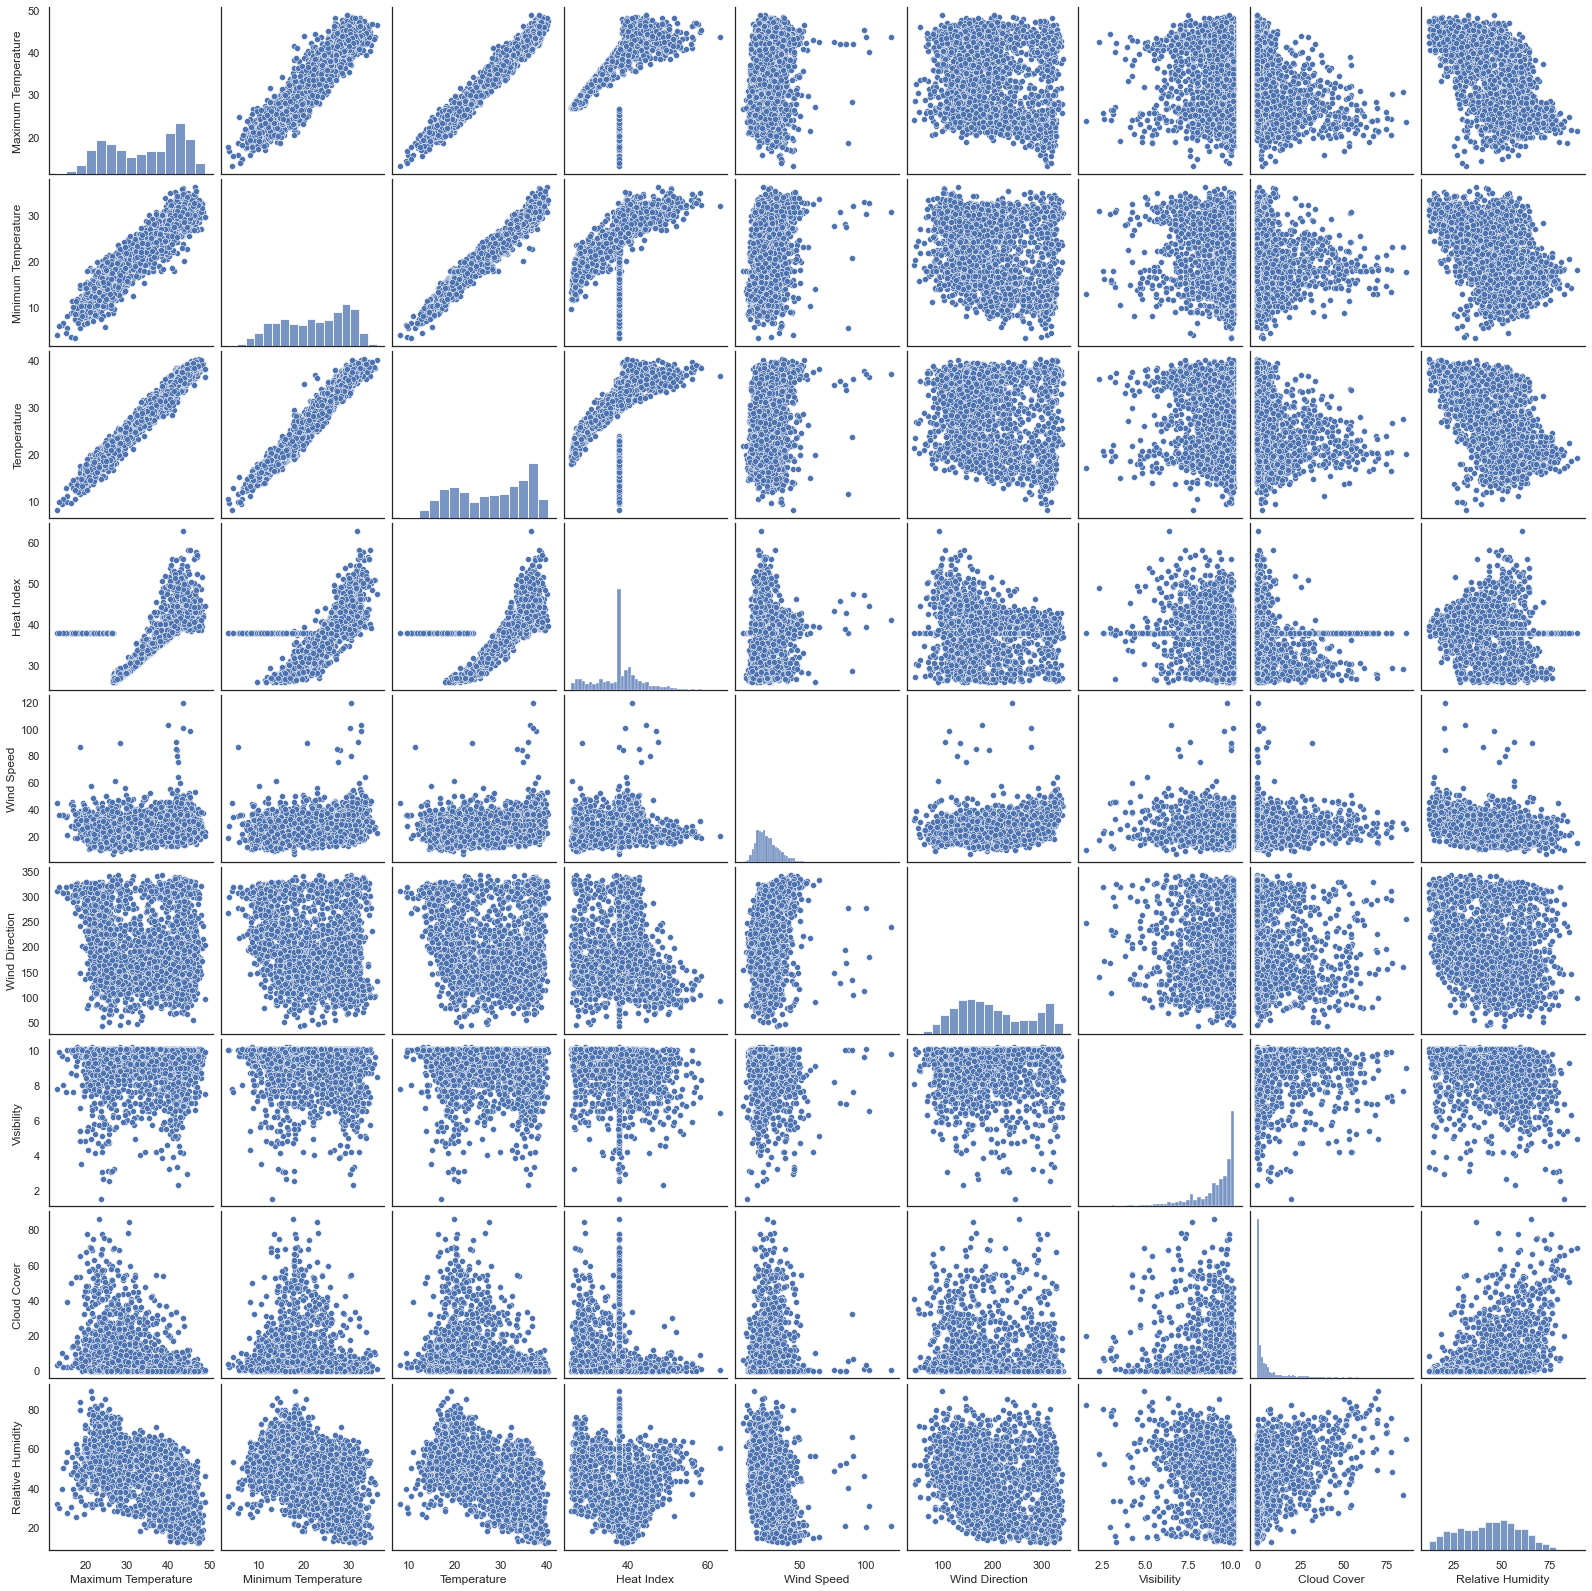

In [726]:
# Variable Correlations

sns.pairplot(df)

👇 Correlation plots are great for seeing which kinds of features 'move' with each other.


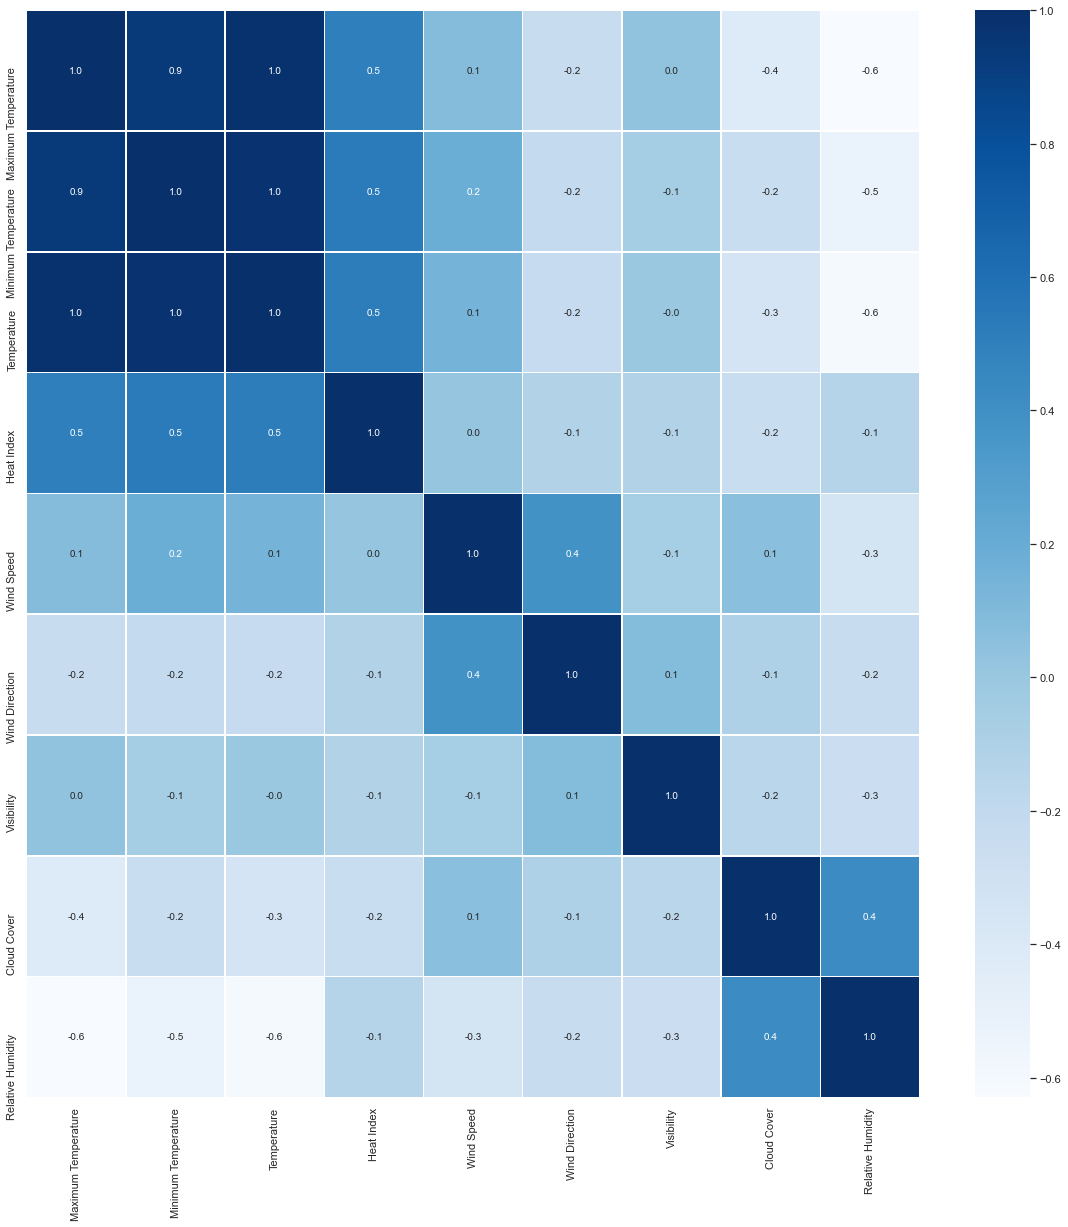

In [727]:
# 7- heatmap 
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True,cmap="Blues", linewidths=.5, fmt= '.1f')
plt.show()

# Time Series: 

- Time series is a sequence of data points recorded in time order, often taken at successive equally paced points in time.
- Time Series Analysis comprised methods for analyzing time series data in order to extract meaningful statistics and other characteristics of the data.
- Time Series forecasting which is the use of a model to predict future values based on previously observed values. 



# Auto-TS : 

- It is an open-source python library basically used to automate Time Series Forecasting. It will automatically train multiple time series models using a single line of code, which will help us to choose the best one for our problem statement.



In [728]:
from autots.evaluator.auto_ts import AutoTS
from autots.tools.transform import GeneralTransformer, RandomTransform
from autots.tools.shaping import long_to_wide
from autots.tools.regressor import create_lagged_regressor, create_regressor
from autots.evaluator.auto_model import model_forecast


In [729]:
#import os

In [743]:
import autots

In [744]:
from autots import AutoTS 

In [745]:
from auto_ts import auto_timeseries


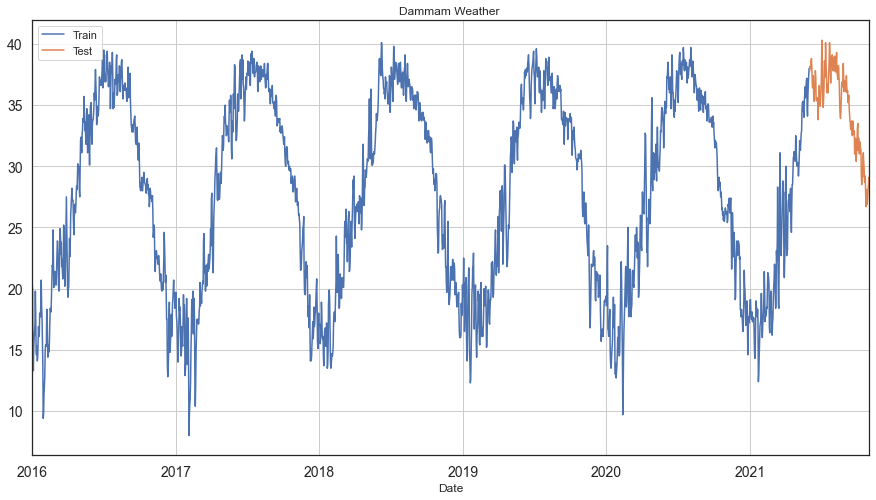

In [746]:
# split the entire data into train and test data
# i split it in this way because i want to test on the last 4 months starting from June till October.
train_df = df[0:1978]
test_df = df[1978:]

#visualize the train test split: 
train_df.Temperature.plot(figsize=(15,8), title= 'Dammam Weather', fontsize=14, label='Train')
test_df.Temperature.plot(figsize=(15,8), title= 'Dammam Weather ', fontsize=14, label='Test')
plt.legend()
plt.grid()
plt.show()

Auto_TimeSeries enables you to build and select multiple time series models using techniques such as ARIMA, SARIMAX, VAR, decomposable (trend+seasonality+holidays) models, and ensemble machine learning models.

In [747]:
# initialize the Auto-TS model object, and fit the training data : 
model = auto_timeseries(forecast_period=120, score_type='rmse',  model_type='best')


Start of Fit.....
    Target variable given as = Temperature
Start of loading of data.....
Input is data frame. Performing Time Series Analysis
ts_column: Date sep: , target: Temperature
    Loaded pandas dataframe...
    pandas Dataframe loaded successfully. Shape of data set = (1978, 11)
No time series plot since verbose = 0. Continuing
Time Interval is given as D
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running Facebook Prophet Model...
  Starting Prophet Fit
      No seasonality assumed since seasonality flag is set to False
  Starting Prophet Cross Validation
Max. iterations using expanding window cross validation = 5

Fold Number: 1 --> Train Shape: 1378 Test Shape: 120
    Root Mean Squared Error predictions vs actuals = 2.12
    Std Deviation of actuals = 5.68
    Normalized RMSE = 37%
Cross Validation window: 1 completed

Fold Number: 2 --> Train Shape: 1498 Test Shape: 120
    Root Mean Squared Error predictions vs 

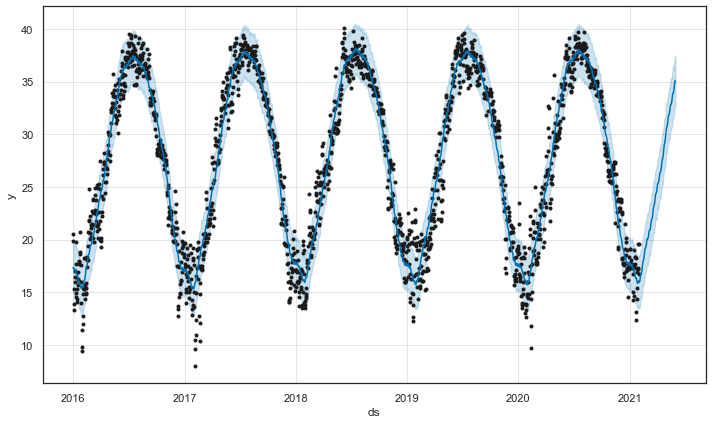

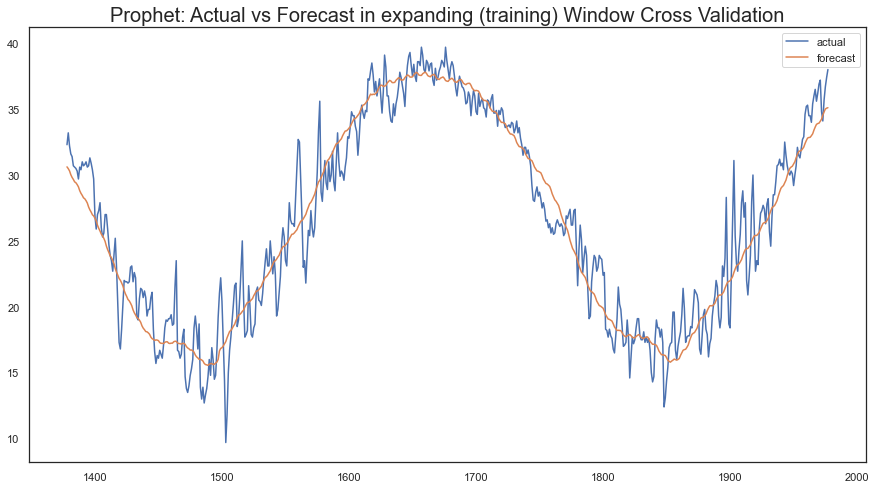

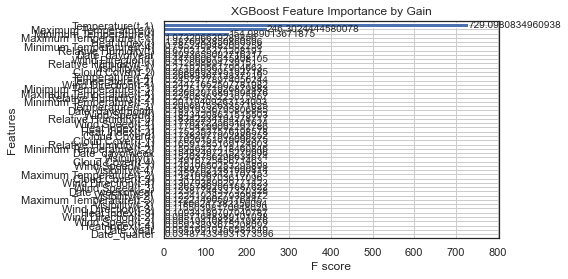

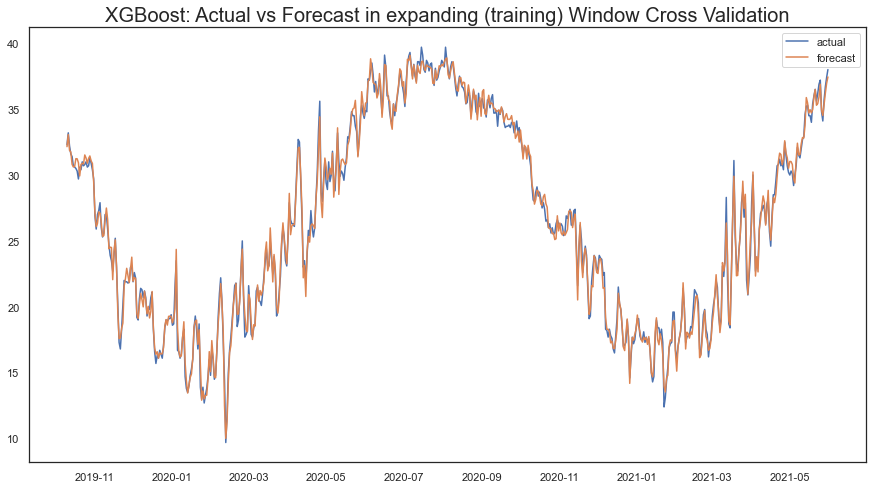

In [750]:
# ts_column is the name of the datetime column in the dataset 
# the target variable is temperature
model.fit(traindata= train_df, ts_column="Date", target="Temperature")


👆🏻 from the previous step it showed which model is the best according to RMSE score : 
            name      rmse
2            ML  0.581661
0       Prophet  1.981375
1  auto_SARIMAX       inf

👇🏻 we test the model on the test set. 


In [749]:
test = model.predict(test_df)
print(test)

For large datasets: ML predictions will take time since it has to predict each row and use that for future predictions...
    ML predictions completed
                 yhat  mean_se  mean_ci_lower  mean_ci_upper
Date                                                        
2021-06-01  37.459557      NaN            NaN            NaN
2021-06-02  37.868336      NaN            NaN            NaN
2021-06-03  37.782017      NaN            NaN            NaN
2021-06-04  38.101112      NaN            NaN            NaN
2021-06-05  38.014118      NaN            NaN            NaN
...               ...      ...            ...            ...
2021-10-27  27.396517      NaN            NaN            NaN
2021-10-28  27.971649      NaN            NaN            NaN
2021-10-29  27.316912      NaN            NaN            NaN
2021-10-30  28.535494      NaN            NaN            NaN
2021-10-31  28.644131      NaN            NaN            NaN

[153 rows x 4 columns]


In [676]:
df=df.reset_index(drop=True)
df

,City,Maximum Temperature,Minimum Temperature,Temperature,Heat Index,Wind Speed,Wind Direction,Visibility,Cloud Cover,Relative Humidity,Conditions,Date,year
0,Dammam,24.9,16.8,20.5,37.787644,29.2,107.75,7.4,25.7,77.88,Rain,2016-01-01,2016
1,Dammam,22.6,17.2,19.9,37.787644,35.7,236.04,8.5,46.6,69.92,Partially cloudy,2016-01-02,2016
2,Dammam,16.8,11.3,13.9,37.787644,45.5,318.92,9.9,13.4,55.57,Clear,2016-01-03,2016
3,Dammam,18.3,9.8,13.3,37.787644,28.6,315.67,10.0,13.0,56.54,Clear,2016-01-04,2016
4,Dammam,19.6,11.6,15.3,37.787644,17.7,301.08,9.6,42.1,58.43,Partially cloudy,2016-01-05,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2126,Dammam,33.5,21.2,27.3,31.800000,13.9,96.21,9.9,0.2,45.91,Clear,2021-10-27,2021
2127,Dammam,33.5,22.0,28.1,33.100000,15.0,127.88,9.9,1.2,55.20,Clear,2021-10-28,2021
2128,Dammam,32.5,23.3,28.4,33.700000,22.6,115.50,9.2,4.6,64.71,Clear,2021-10-29,2021
2129,Dammam,33.8,25.5,29.1,34.300000,19.2,102.88,9.7,4.9,63.86,Clear,2021-10-30,2021


 👇🏻 here i want to predict the temperature of the 4 upcoming months 

In [677]:
model =AutoTS(forecast_length=120, frequency= 'infer', ensemble= 'simple')
model.fit(df, date_col='Date', value_col='Temperature', id_col = None)
pred = model.predict()
forecast = pred.forecast
print (forecast)

Inferred frequency is: D
Model Number: 1 with model AverageValueNaive in generation 0 of 10
Model Number: 2 with model AverageValueNaive in generation 0 of 10
Model Number: 3 with model AverageValueNaive in generation 0 of 10
Model Number: 4 with model DatepartRegression in generation 0 of 10
Model Number: 5 with model DatepartRegression in generation 0 of 10
Model Number: 6 with model DatepartRegression in generation 0 of 10
Model Number: 7 with model DatepartRegression in generation 0 of 10
Template Eval Error: ImportError('Tensorflow not available, install with pip install tensorflow.') in model 7: DatepartRegression
Model Number: 8 with model ETS in generation 0 of 10
Model Number: 9 with model ETS in generation 0 of 10
Model Number: 10 with model GLM in generation 0 of 10
Model Number: 11 with model GLM in generation 0 of 10
Model Number: 12 with model GLS in generation 0 of 10
Model Number: 13 with model GLS in generation 0 of 10
Model Number: 14 with model GluonTS in generation 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Model Number: 501 with model UnivariateMotif in generation 5 of 10
Model Number: 502 with model UnobservedComponents in generation 5 of 10
Model Number: 503 with model UnobservedComponents in generation 5 of 10
Model Number: 504 with model UnobservedComponents in generation 5 of 10
Model Number: 505 with model GluonTS in generation 5 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 505: GluonTS
Model Number: 506 with model GluonTS in generation 5 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 506: GluonTS
Model Number: 507 with model GluonTS in generation 5 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 507: GluonTS
Model Number: 508 with model GluonTS in generation 5 of 10
Template Eval Error: ImportError('GluonTS installation not found

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Model Number: 528 with model WindowRegression in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 528: WindowRegression
Model Number: 529 with model SectionalMotif in generation 6 of 10
Model Number: 530 with model SectionalMotif in generation 6 of 10
Model Number: 531 with model SectionalMotif in generation 6 of 10
Model Number: 532 with model SectionalMotif in generation 6 of 10
Model Number: 533 with model AverageValueNaive in generation 6 of 10
Model Number: 534 with model AverageValueNaive in generation 6 of 10
Model Number: 535 with model AverageValueNaive in generation 6 of 10
Model Number: 536 with model FBProphet in generation 6 of 10
Model Number: 537 with model FBProphet in generation 6 of 10
Model Number: 538 with model FBProphet in generation 6 of 10
Model Number: 539 with model FBProphet in generation 6 of 10
Model Number: 540 with model GLS in generation 6 of 10
Model Number: 541 with model GLS in genera

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Model Number: 713 with model UnivariateMotif in generation 8 of 10
Template Eval Error: TypeError("unsupported operand type(s) for -: 'NoneType' and 'int'") in model 713: UnivariateMotif
Model Number: 714 with model UnivariateMotif in generation 8 of 10
Template Eval Error: TypeError("unsupported operand type(s) for -: 'NoneType' and 'int'") in model 714: UnivariateMotif
Model Number: 715 with model UnivariateMotif in generation 8 of 10
Template Eval Error: TypeError("unsupported operand type(s) for -: 'NoneType' and 'int'") in model 715: UnivariateMotif
Model Number: 716 with model UnobservedComponents in generation 8 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 716: UnobservedComponents
Model Number: 717 with model UnobservedComponents in generation 8 of 10
Model Number: 718 with model UnobservedComponents in generation 8 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in mod

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Model Number: 789 with model UnivariateMotif in generation 9 of 10
Model Number: 790 with model UnobservedComponents in generation 9 of 10
Model Number: 791 with model UnobservedComponents in generation 9 of 10
Model Number: 792 with model UnobservedComponents in generation 9 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 792: UnobservedComponents
Model Number: 793 with model GluonTS in generation 9 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 793: GluonTS
Model Number: 794 with model GluonTS in generation 9 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 794: GluonTS
Model Number: 795 with model GluonTS in generation 9 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 795: Gluon

<AxesSubplot:>

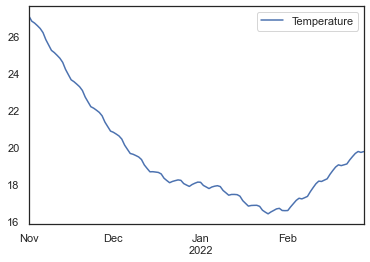

In [740]:
# plotting the prediction
forecast.plot()